# **Loading the data and other imports**

In [149]:
import pandas as pd
import numpy as np

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
%matplotlib inline

In [152]:
df = pd.read_csv('/content/lending_club_loan_two.csv')

In [153]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# **Exploratory Data Analysis**

<ipython-input-155-b8b459ad608a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='bright')


<Axes: xlabel='loan_status', ylabel='count'>

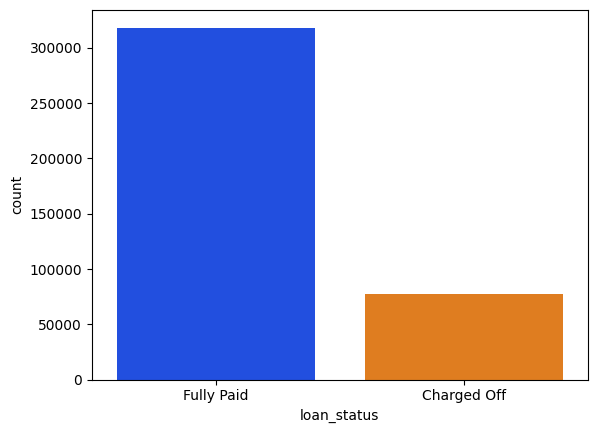

In [155]:
sns.countplot(x='loan_status', data=df, palette='bright')

(0.0, 45000.0)

<Figure size 1800x1000 with 0 Axes>

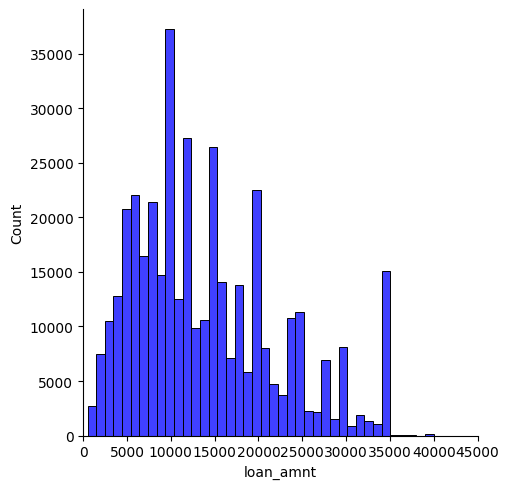

In [156]:
plt.figure(figsize=(18, 10))
plt.tight_layout()
sns.displot(df['loan_amnt'], kde=False, color='blue',  bins=40)
plt.xlim(0,45000)

In [157]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

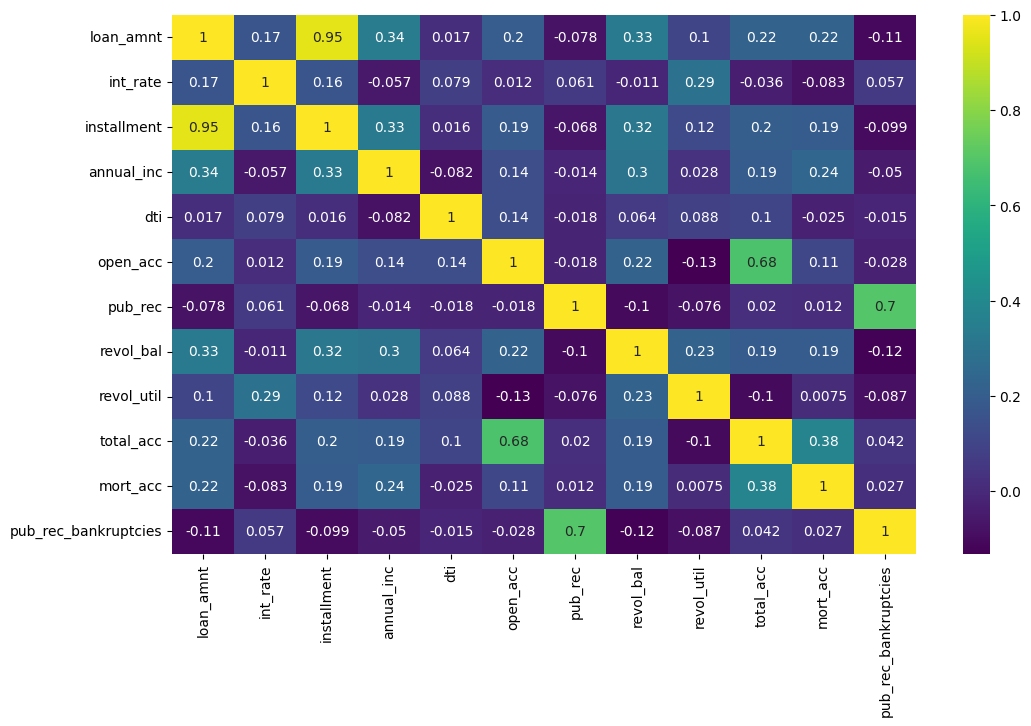

In [158]:
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis')

<Axes: xlabel='installment', ylabel='loan_amnt'>

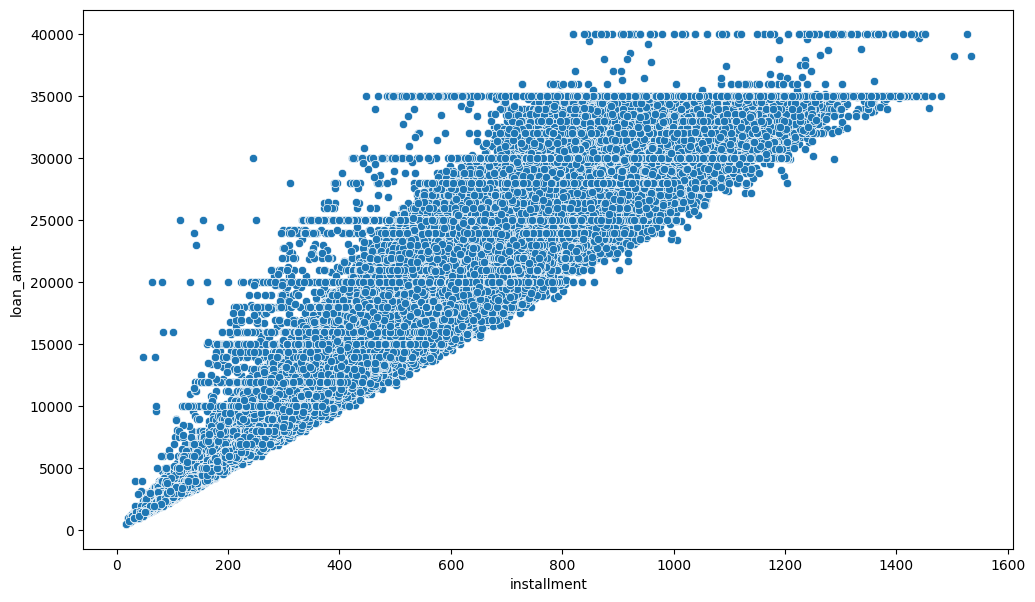

In [159]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<ipython-input-160-74eba4886ebf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status',y='loan_amnt',data=df, palette='rainbow')


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

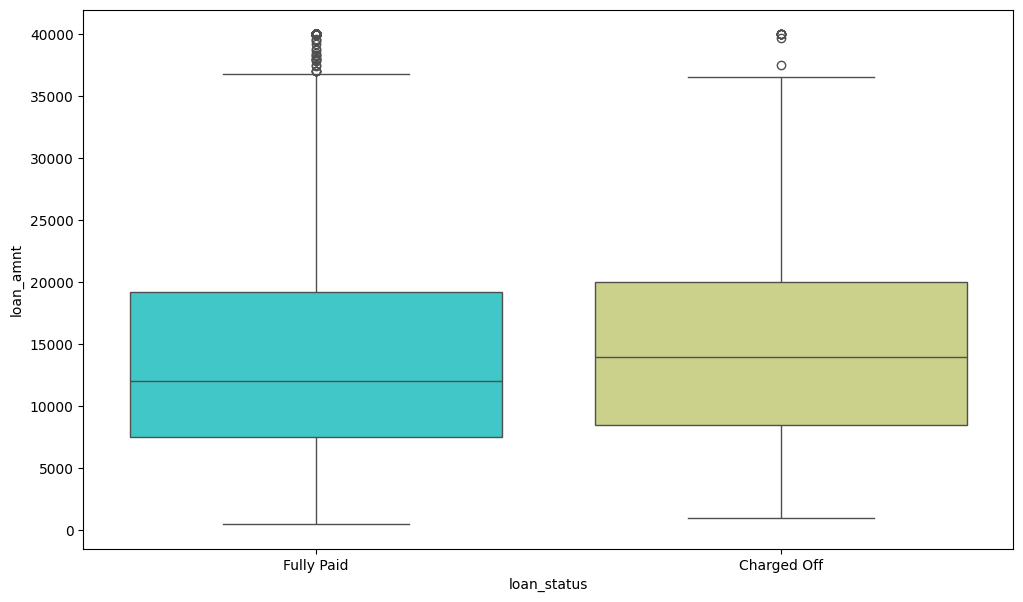

In [160]:
plt.figure(figsize=(12,7))
sns.boxplot(x='loan_status',y='loan_amnt',data=df, palette='rainbow')

In [161]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [162]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [163]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

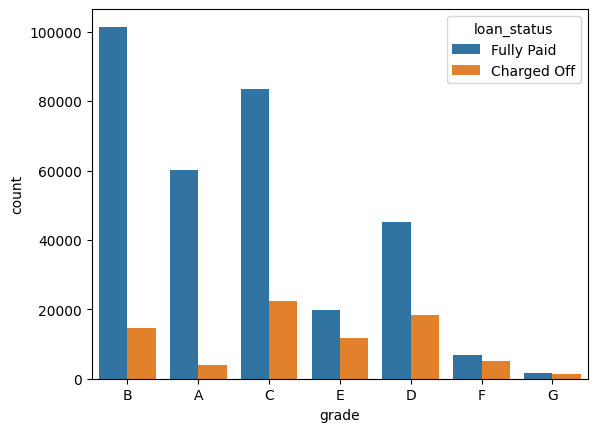

In [164]:
sns.countplot(x='grade',data=df,hue='loan_status')

<ipython-input-165-94153f42f690>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )


<Axes: xlabel='sub_grade', ylabel='count'>

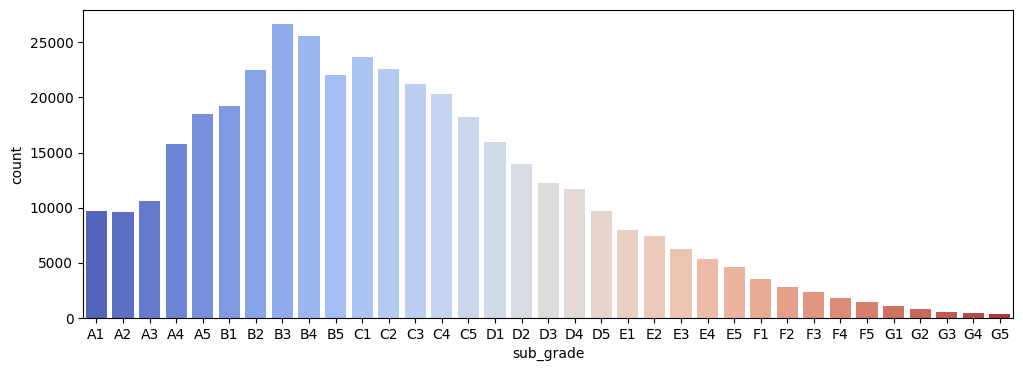

In [165]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

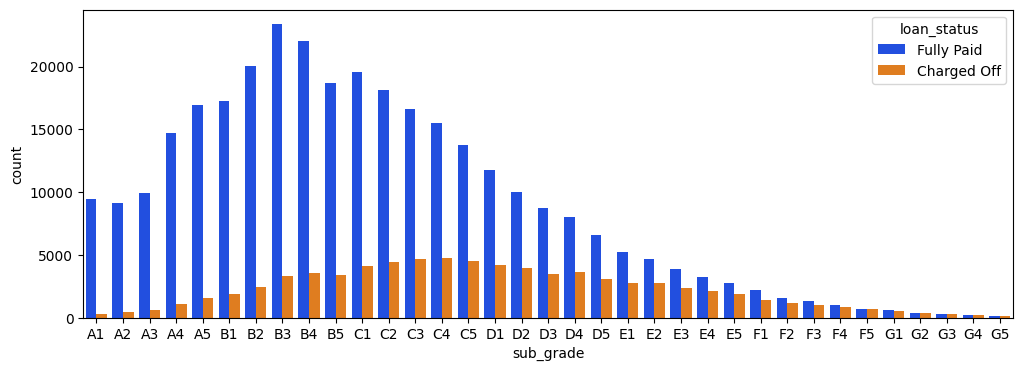

In [166]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='bright' ,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

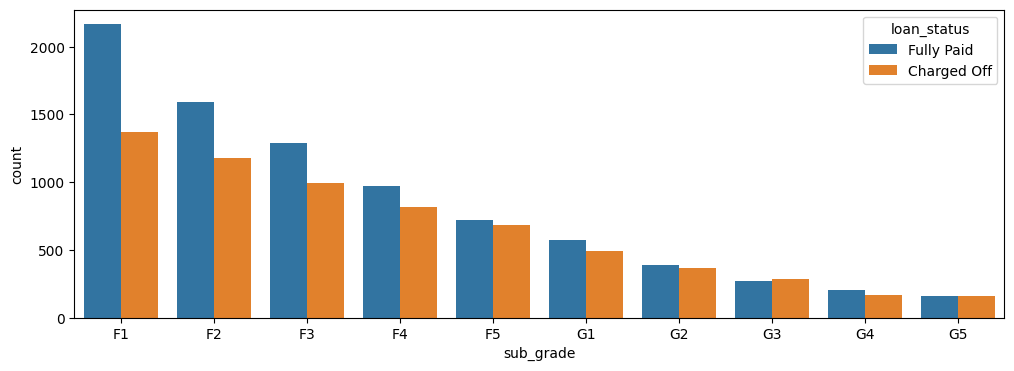

In [167]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [168]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [169]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [170]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

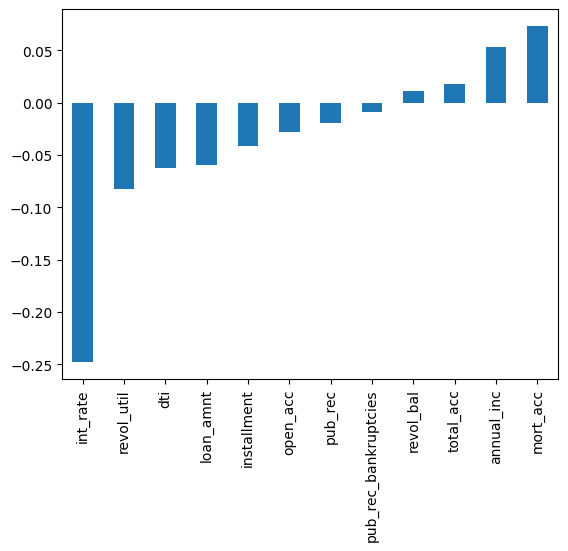

In [171]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# **Data PreProcessing**

In [172]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [173]:
df.shape

(396030, 28)

In [174]:
len(df)

396030

In [175]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [176]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [177]:
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
Postman,1
"McCarthy & Holthus, LLC",1
jp flooring,1


Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [178]:
df.drop('emp_title', axis=1, inplace=True)

In [179]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [180]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<ipython-input-181-a50243a4cae2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='bright')


<Axes: xlabel='emp_length', ylabel='count'>

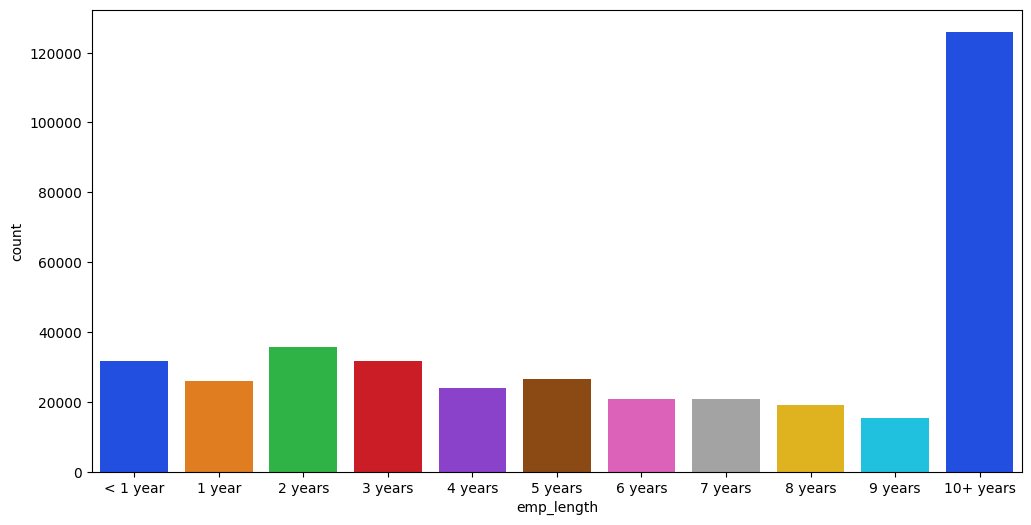

In [181]:
plt.figure(figsize=(12,6))

sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='bright')

<Axes: xlabel='emp_length', ylabel='count'>

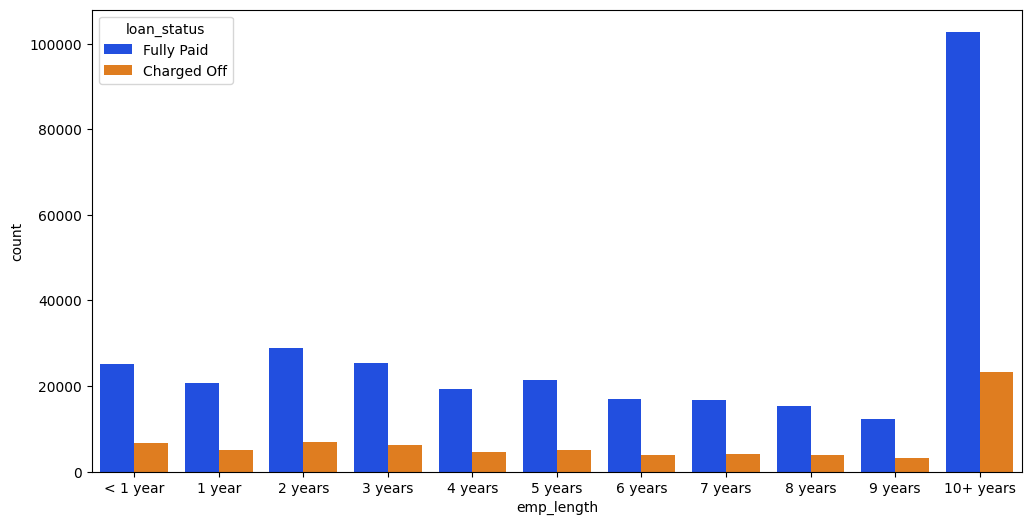

In [182]:
plt.figure(figsize=(12,6))

sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='bright', hue='loan_status')

In [183]:
df = df.drop('emp_length',axis=1)

In [184]:
df['purpose'].head(10)

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card
5,debt_consolidation
6,home_improvement
7,credit_card
8,debt_consolidation
9,debt_consolidation


In [185]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790
small_business,5701
car,4697
medical,4196
moving,2854


In [186]:
df = df.drop('title',axis=1)

In [187]:
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


In [188]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()['mort_acc'].sort_values()

,mort_acc
int_rate,-0.082583
dti,-0.025439
revol_util,0.007514
pub_rec,0.011552
pub_rec_bankruptcies,0.027239
loan_repaid,0.073111
open_acc,0.109205
installment,0.193694
revol_bal,0.194925
loan_amnt,0.222315


In [189]:
# Ensure mort_acc and total_acc are numeric
df['mort_acc'] = pd.to_numeric(df['mort_acc'], errors='coerce')
df['total_acc'] = pd.to_numeric(df['total_acc'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['mort_acc', 'total_acc'])

# Group by total_acc and calculate mean of mort_acc
result = df.groupby('total_acc')['mort_acc'].mean()

# Display the result
print(result)

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [190]:
result[2.0]

0.0

In [191]:
def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return result[total_acc]
    else:
        return mort_acc

In [192]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [193]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [194]:
df = df.dropna()

In [195]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


### Categorical Variables and Dummy Variables

In [196]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [197]:
df['term'].value_counts()

,count
term,
36 months,273605
60 months,84409


In [198]:
df = df.copy()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [199]:
df['term'].value_counts()

,count
term,
36,273605
60,84409


In [200]:
df = df.drop('grade',axis=1)

In [201]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [203]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [204]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [205]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [206]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

In [207]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [208]:
df = pd.concat([df, dummies],axis=1)

In [209]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,181592
RENT,141604
OWN,34752
OTHER,34
NONE,29
ANY,3


In [210]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [211]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,181592
RENT,141604
OWN,34752
OTHER,66


In [212]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [213]:
df['address']

,address
0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,"823 Reid Ford\nDelacruzside, MA 00813"
4,"679 Luna Roads\nGreggshire, VA 11650"
...,...
396024,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,"953 Matthew Points Suite 414\nReedfort, NY 70466"


In [214]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [215]:
df['zip_code'].value_counts()

,count
zip_code,
70466,51552
30723,51180
22690,51030
48052,50556
00813,41156
29597,40858
05113,40752
11650,10412
93700,10347


In [216]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [217]:
df['issue_d']

,issue_d
0,Jan-2015
1,Jan-2015
2,Jan-2015
3,Nov-2014
4,Apr-2013
...,...
396024,Mar-2013
396025,Oct-2015
396026,Feb-2015
396027,Oct-2013


In [218]:
df = df.drop('issue_d', axis=1)

In [219]:
df['earliest_cr_line']

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999
...,...
396024,Nov-1991
396025,Nov-2004
396026,Feb-2006
396027,Mar-1997


In [220]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [221]:
df = df.drop('earliest_cr_line',axis=1)

In [222]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [223]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,False,False,True,False,False,False,False,False,False,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,True,False,False,False,False,False,False,False,False,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,True,False,False,False,False,False,False,False,False,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,False,True,False,False,False,False,False,False,False,1999


In [224]:
df = df.drop('loan_status',axis=1)

In [225]:
df['loan_repaid']

,loan_repaid
0,1
1,1
2,1
3,1
4,0
...,...
396024,1
396025,1
396026,1
396027,1


In [226]:
df['loan_repaid'].value_counts()

,count
loan_repaid,
1,285936
0,72078
